# Tensorflow practice C3W2

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# download bbc-text
!gdown --id 1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj

Downloading...
From: https://drive.google.com/uc?id=1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj
To: /Users/jinwooahn/Documents/dev_folder/2021_2nd_semester/tensorflow_certificate/C3/W2/bbc-text.csv
100%|██████████████████████████████████████| 5.06M/5.06M [00:00<00:00, 7.29MB/s]


In [5]:
#define parameters
vocab_size=1000
embedding_dim=16
max_length=120
#truncate : max_length보다 길면 문장 잘라버림
#자르는 기준을 뒤를 자르느냐 앞으로 자르느냐에 따라 post, pre로 설정
trunc_type='post'
padding_type='post'
oov_tok ="<oov>"
training_portion=.8

In [42]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [43]:
with open('./bbc-text.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = ' ' + word + ' '
            sentence = sentence.replace(token, ' ')
            sentence = sentence.replace('  ', ' ')
        sentences.append(sentence)

In [44]:
print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cab

In [45]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))


1780
1780
1780
445
445


In [46]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen = max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [47]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences) # YOUR CODE HERE
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length) # YOUR CODE HERE

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [48]:
# label 도 동일하게 작업
label_tokenizer = Tokenizer() # YOUR CODE HERE
label_tokenizer.fit_on_texts(labels) # YOUR CODE HERE

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels)) # YOUR CODE HERE
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels)) # YOUR CODE HERE

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [25]:
tmp = set()
for ar in validation_label_seq:
    tmp.add(ar[0])

In [26]:
tmp

{1, 2, 3, 4, 5}

In [49]:
# define model
model = tf.keras.Sequential([
    #embedding layer은 첫 번째 layer로만 사용가능하다
    #vocabsize은 1000미만이여야함
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [50]:
num_epochs=30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs,
                   validation_data=(validation_padded, validation_label_seq),verbose=2)

Epoch 1/30


2021-11-17 17:34:41.477577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


56/56 - 1s - loss: 1.7575 - accuracy: 0.2281 - val_loss: 1.7124 - val_accuracy: 0.2270


2021-11-17 17:34:42.110412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/30
56/56 - 1s - loss: 1.6620 - accuracy: 0.2303 - val_loss: 1.6064 - val_accuracy: 0.2270
Epoch 3/30
56/56 - 0s - loss: 1.5344 - accuracy: 0.2792 - val_loss: 1.4740 - val_accuracy: 0.3753
Epoch 4/30
56/56 - 0s - loss: 1.3633 - accuracy: 0.5685 - val_loss: 1.2964 - val_accuracy: 0.6607
Epoch 5/30
56/56 - 0s - loss: 1.1476 - accuracy: 0.7376 - val_loss: 1.0847 - val_accuracy: 0.7079
Epoch 6/30
56/56 - 0s - loss: 0.9354 - accuracy: 0.7893 - val_loss: 0.9092 - val_accuracy: 0.8135
Epoch 7/30
56/56 - 0s - loss: 0.7614 - accuracy: 0.8685 - val_loss: 0.7657 - val_accuracy: 0.8742
Epoch 8/30
56/56 - 0s - loss: 0.6236 - accuracy: 0.9180 - val_loss: 0.6482 - val_accuracy: 0.8742
Epoch 9/30
56/56 - 0s - loss: 0.5135 - accuracy: 0.9348 - val_loss: 0.5545 - val_accuracy: 0.9101
Epoch 10/30
56/56 - 0s - loss: 0.4243 - accuracy: 0.9489 - val_loss: 0.4776 - val_accuracy: 0.9124
Epoch 11/30
56/56 - 0s - loss: 0.3509 - accuracy: 0.9545 - val_loss: 0.4147 - val_accuracy: 0.9213
Epoch 12/30
56/56 

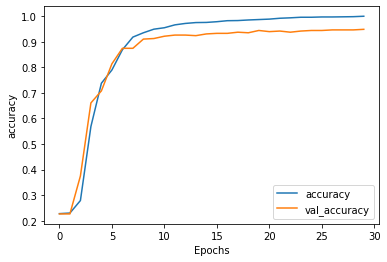

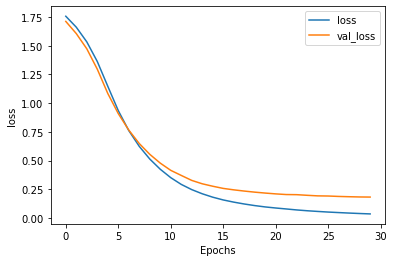

In [51]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [52]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [53]:
#get weights of model
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [54]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

/Users/jinwooahn/miniforge3/envs/tf_certificate/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets
